In [2]:
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split

from copy import deepcopy
# from mcts import mcts


from scipy import stats

In [3]:
import numpy as np

In [ ]:
# use density as fitness

In [293]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

# landscape simulation

In [1000]:
C1

array([[-6,  4],
       [-2, -6],
       [ 5,  7]])

335


(-10.0, 10.0)

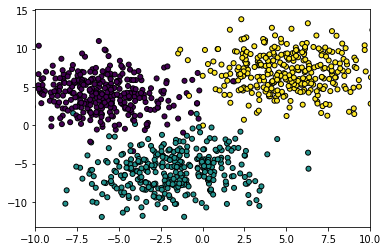

In [999]:
# Make blobs with 4 clutsers, low high and median fit ness
seed= np.random.randint(0,1000)
# seed = 257
# seed = 169
# seed = 253
print(seed)
X1, Type1,C1 = make_blobs(n_samples=1000, n_features=2, cluster_std=[2.3,2.5,2.5],
                        centers=[[-6,4],[-2,-6],[5,7]],
                        random_state=seed,
                        return_centers=True)

plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Type1, s=25, edgecolor="k")
plt.xlim(-10,10)
plt.xlim(-10,10)

479


(-10.0, 10.0)

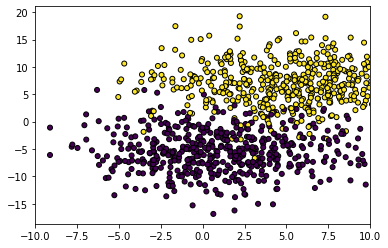

In [470]:
# Make blobs with 4 clutsers, low high and median fit ness
seed= np.random.randint(0,1000)
# seed = 257
# seed = 169
# seed = 253
print(seed)
X2, Type2,C = make_blobs(n_samples=1000, n_features=3, cluster_std=4,
                        centers=[[1,-5.5], [5,7]],random_state=seed,
                        return_centers=True)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Type2, s=25, edgecolor="k")
plt.xlim(-10,10)
plt.xlim(-10,10)

In [471]:
Type2 = np.where(Type2!=0,Type2,3) # 0 ->3
Type2 = np.where(Type2!=1,Type2,4) # 1 ->4

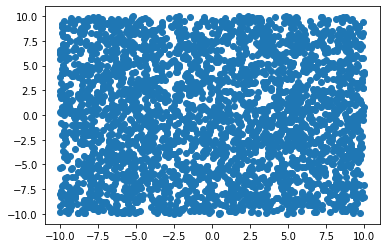

In [824]:
background = np.random.random(size=(3000,2))*20 - 10
background_label = np.full((3000,),5)
plt.scatter(background[:, 0], background[:, 1], marker="o",)

(-10.0, 10.0)

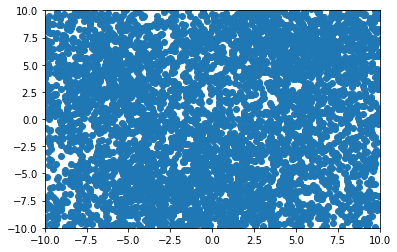

In [825]:
all_X = np.concatenate([X1, X2, background], axis=0)
plt.scatter(all_X[:, 0], all_X[:, 1], marker="o",)
plt.xlim(-10,10)
plt.ylim(-10,10)

In [835]:
xx, yy, zz = kde2D(all_X[:,0], all_X[:,1], 0.5)

(-10.5, 10.5)

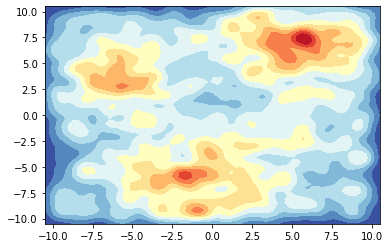

In [836]:
fig = plt.figure()
ax = fig.gca()
cntr = ax.contourf(xx, yy, zz, levels=10, cmap="RdYlBu_r")
plt.xlim(-10.5,10.5)
plt.ylim(-10.5,10.5)

In [837]:
Label = np.concatenate([Type1, Type2, background_label], axis=0)

In [838]:
Label

array([1, 2, 0, ..., 5, 5, 5])

# Sequence simulation function

In [839]:
# Rule of generating random sequence
# detect which rule the sequences fit in, which is also the true fitness func
def detect_rule(seq, Y_rule):
    """
    detect which rule the input sequence fits 
    Arguments:
        seq: str
        Y_rule : dict
    Return:
        is_follow : list
    """
    follows = []
    for label, rule in Y_rule.items():
        if rule == 'background':
            # skip this rule
            continue
        else:
            # print(label)
            fit_rule = []
            for site, base in rule.items():
                fit_rule.append(seq[site] == base)
            if np.all(fit_rule):
                follows.append(label)
    if len(follows)==1:
        follows = follows[0]
    elif follows == []:
        follows = 5
        
    return follows

def randDNA(length,base_dict):
    """generate sequences by the define rule"""
    seq = [random.choice('CGTA') for _ in range(length)]
    if base_dict != 'background':
        for item in base_dict:
            seq[item] = base_dict[item]
    return seq
    
# Seqnece rules
def data_simulation_by_rules(length,Y_rule, label):
    """generate sequences and then go through rule check"""
    # generate sequences
    base_dict = Y_rule[label]
    seq = randDNA(length,base_dict)
    
    # sanity check, make sure it only follows the specifed rule
    hit_other_rule = detect_rule(seq, Y_rule)
        
    while np.all(hit_other_rule != label):
        # if the simulated sequences does
        # generate a new sequence
        seq = randDNA(length,base_dict)
        hit_other_rule = detect_rule(seq, Y_rule)
    return (seq)

In [840]:
detect_rule('KKKKKKKKKKKKKKK',Y_rule)

5

# Rule of sequence and Type
Dict format is class:{position1:base1,position2:base2}

In [841]:
from tqdm.auto import tqdm

In [842]:
# Custom rule of sequence of X1 and Type
# Dict format is class:{position1:base1,position2:base2}
# Type 0: x0 small, x1 large;
# Type 1: x0 large, x1 large;
# Type 2: x0 small, x1 small;
# Type 3: x0 large, x1 small;
Y_rule = {
    # highest density
    0:{3:"A",7:"A"},
    1:{5:"G",6:"A",7:"A"},
    2:{2:"G",3:"G",4:"A"},
    #
    3:{3:"C",7:"T"},  # similar to 1
    4:{9:"A"},        # similar to 2
    # totally random for backgournd
    5:"background"
}    

In [843]:
X_seqs = [data_simulation_by_rules(10,Y_rule,label)for label in tqdm(Label)]

  0%|          | 0/5000 [00:00<?, ?it/s]

In [844]:
X_seqs[:10]

[['C', 'A', 'T', 'A', 'A', 'G', 'A', 'A', 'T', 'G'],
 ['C', 'G', 'G', 'G', 'A', 'A', 'G', 'G', 'C', 'C'],
 ['T', 'T', 'A', 'A', 'C', 'G', 'G', 'A', 'C', 'A'],
 ['T', 'A', 'G', 'G', 'A', 'C', 'G', 'C', 'A', 'C'],
 ['A', 'C', 'A', 'A', 'C', 'G', 'T', 'A', 'A', 'T'],
 ['T', 'T', 'A', 'G', 'G', 'G', 'A', 'A', 'C', 'T'],
 ['A', 'C', 'G', 'C', 'C', 'G', 'A', 'A', 'G', 'G'],
 ['A', 'G', 'T', 'A', 'G', 'C', 'T', 'A', 'A', 'C'],
 ['G', 'C', 'A', 'A', 'A', 'G', 'A', 'A', 'C', 'C'],
 ['C', 'T', 'T', 'T', 'T', 'G', 'A', 'A', 'A', 'G']]

In [845]:
# One hot encoding of the input
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_seqs);

In [846]:
enc.categories_

[array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object)]

In [847]:
X_features = enc.transform(X_seqs).toarray()

In [848]:
X_features.shape

(5000, 40)

In [1069]:
# what's y ?
fitness = np.where(Label!=0, Label,   4)
fitness = np.where(Label!=1, fitness, 5.1)
fitness = np.where(Label!=2, fitness, 5.5)
fitness = np.where(Label!=3, fitness, 3.4)
fitness = np.where(Label!=4, fitness, 3.1)
fitness = np.where(Label!=5, fitness, 2)

In [1070]:
fitness.shape[0]

5000

In [1071]:
# add noise
fitness += np.random.randn(5000) *1.1           # noise 1
# fitness += np.random.randn(3000)           # noise 2
fitness += np.random.random(size=fitness.shape)

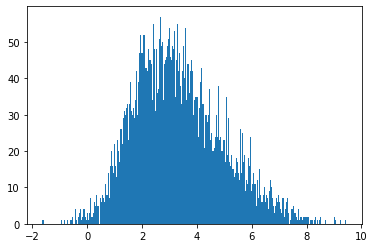

In [1072]:
plt.hist(fitness, bins=300);

In [1073]:
np.unique(fitness)

array([-1.64950771, -1.59867842, -0.92752112, ...,  9.07971734,
        9.25794408,  9.45071147])

In [1074]:
np.unique(Label)

array([0, 1, 2, 3, 4, 5])

In [1075]:
C

array([[ 1. , -5.5],
       [ 5. ,  7. ]])

# Train and test random forest regressor on the generated dataset

In [1076]:
sample_index = np.arange(fitness.shape[0])

60


(-11.0, 11.0)

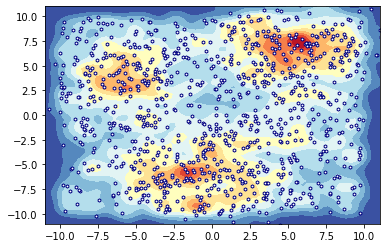

In [1086]:
# Test train split with 20% and 80%
seed= np.random.randint(0,100)
print(seed)
X_train, X_test, train_index, test_index = train_test_split(
    X_features, sample_index, test_size=0.2, random_state=42)

y_train = fitness[train_index]
y_test = fitness[test_index]

testset_point = all_X[test_index]

fig = plt.figure()
ax = fig.gca()
ax.contourf(xx, yy, zz, levels=10, cmap="RdYlBu_r")
ax.scatter(testset_point[:,0], testset_point[:,1], marker='h', s=10,
            color='white', edgecolor='navy')
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)

In [1087]:
test_background_X = np.random.random(size=(2000,2))*20 - 10

In [1088]:
test_background_seq = [data_simulation_by_rules(10,Y_rule,label)for label in tqdm([5]*2000)]
test_background_features = enc.transform(test_background_seq).toarray()

  0%|          | 0/2000 [00:00<?, ?it/s]

In [1089]:
testset_point = all_X[test_index]
testset_point_X = np.concatenate([testset_point, test_background_X], axis=0)

X_test2 = np.concatenate([X_test, test_background_features], axis=0)

In [1090]:
testset_point_X.shape,X_test2.shape

((3000, 2), (3000, 40))

## regression

In [1091]:
X_train.shape

(4000, 40)

In [1092]:
select = np.random.choice(range(2100), 2100//4)
regressor_25p = RandomForestRegressor(n_estimators=10,random_state=0).fit(X_train[select], y_train[select])
y_predict_25p = regressor_25p.predict(X_test)

select_10p = np.random.choice(range(2100), 210)
regressor_10p = RandomForestRegressor(n_estimators=10,random_state=0).fit(X_train[select_10p], y_train[select_10p])
y_predict_10p = regressor_10p.predict(X_test)

select_5p = np.random.choice(range(2100), 105)
regressor_5p = RandomForestRegressor(n_estimators=10,random_state=0).fit(X_train[select_5p], y_train[select_5p])
y_predict_5p = regressor_5p.predict(X_test)

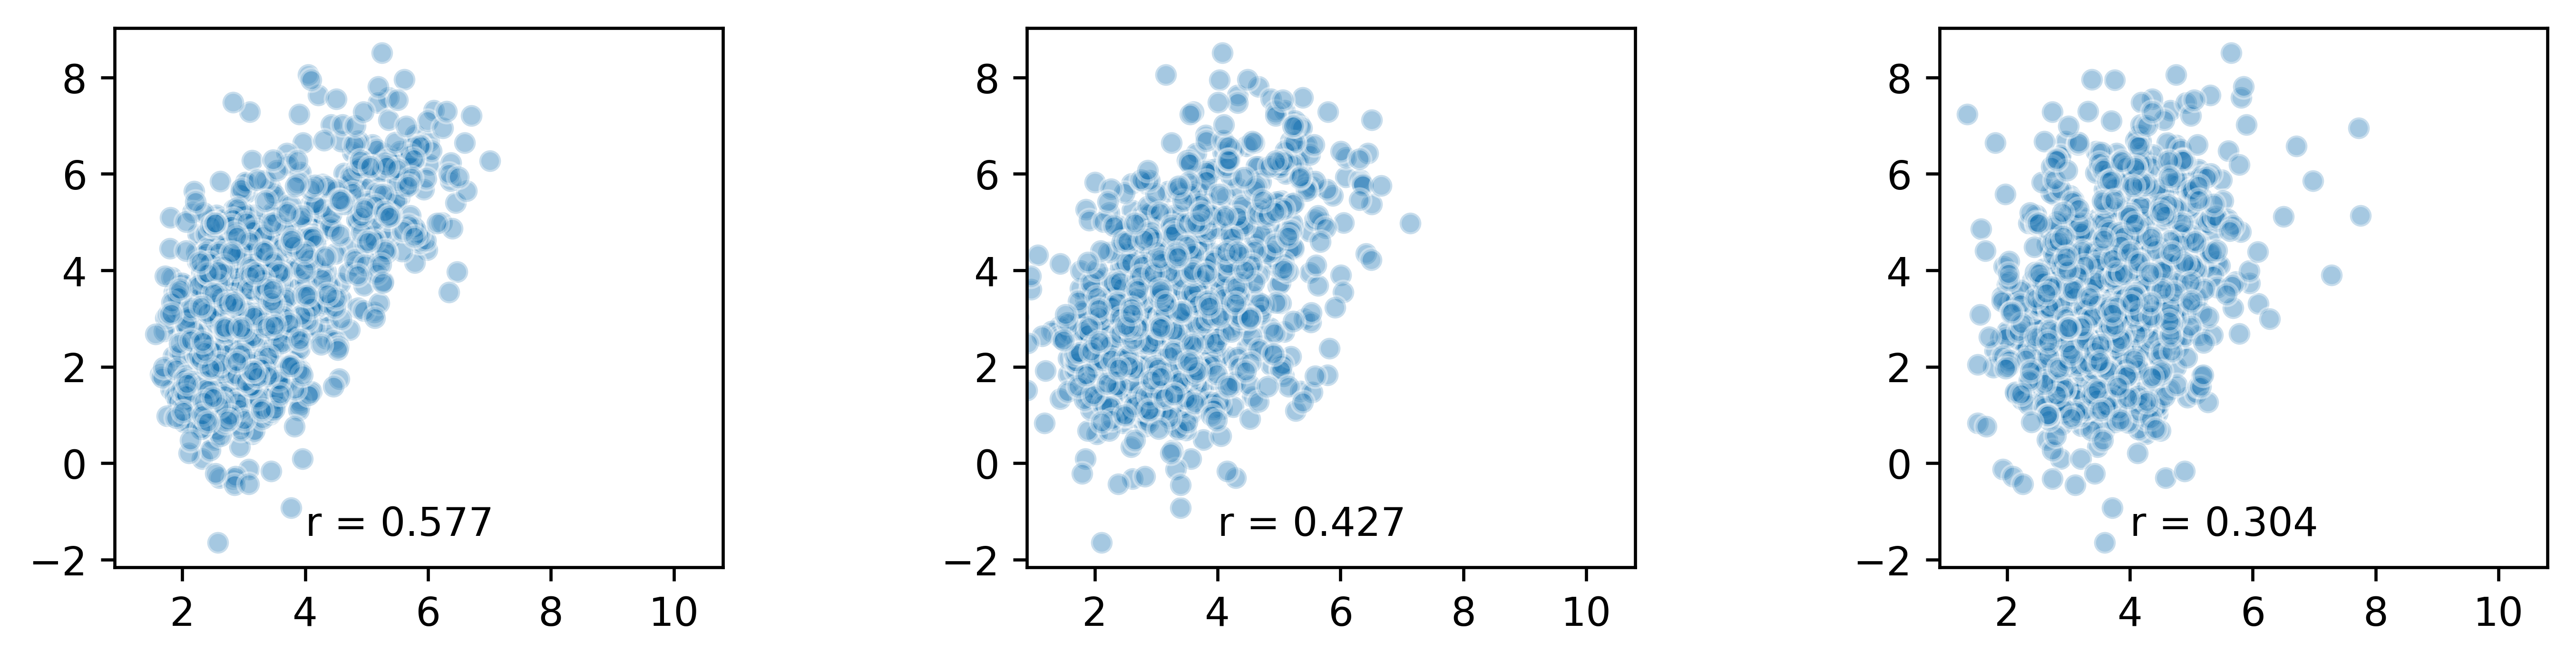

In [1093]:
fig, axs = plt.subplots(1,3, figsize=(11,2.5), dpi=600, gridspec_kw={"wspace":0.5}, sharex=True)
axs = axs.flatten()
axs[0].set_xlim(0.9,10.8)
for i, ypred in enumerate([ y_predict_25p, y_predict_10p, y_predict_5p]):
    axs[i].scatter(ypred, y_test, alpha=0.4, s=30, edgecolor='w') 
    r = stats.pearsonr(y_test, ypred)[0]
    axs[i].text(4., -1.5, "r = %.3f"%r)

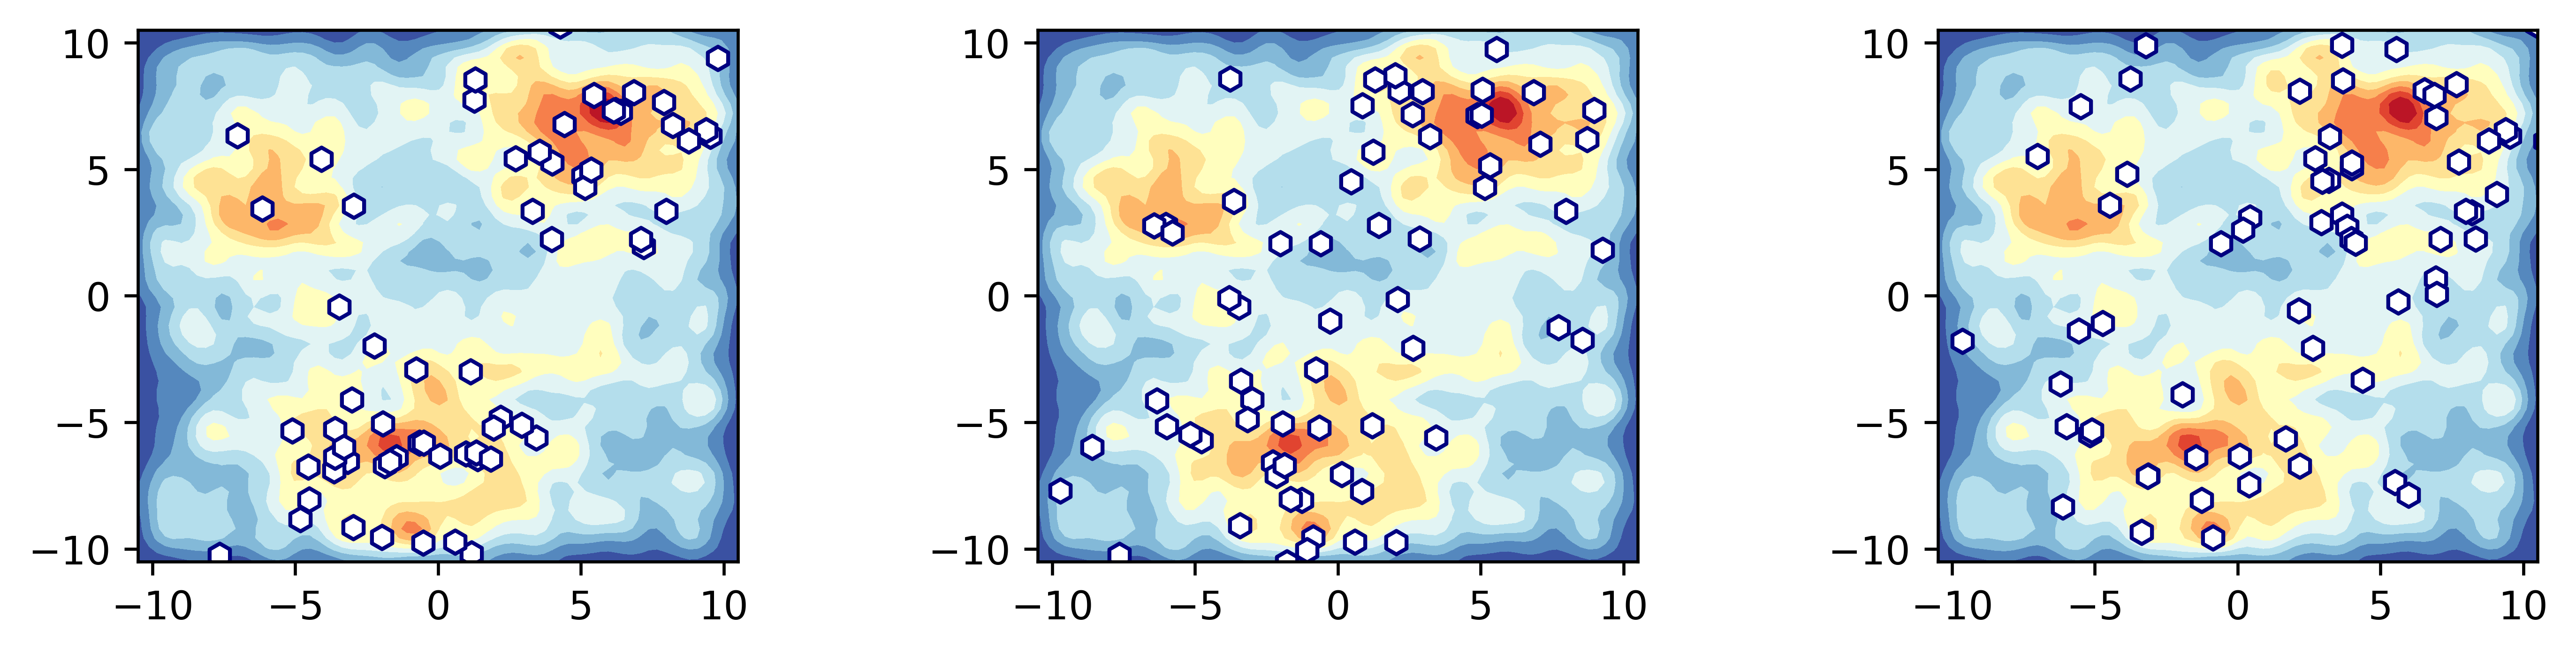

In [1095]:
fig, axs = plt.subplots(1,3, figsize=(11,2.5), dpi=600, gridspec_kw={"wspace":0.5}, sharex=True)
axs = axs.flatten()
for i, reg in enumerate([regressor_25p, regressor_10p, regressor_5p]):
    # select the top 60
    ypred = reg.predict(X_test2)
    shortlist_i = np.argpartition(ypred ,-100)[-100:-30]
    shortlist_x = testset_point_X[shortlist_i]
    axs[i].contourf(xx, yy, zz, levels=10, cmap="RdYlBu_r")
    axs[i].scatter(shortlist_x[:,0], shortlist_x[:,1], marker='h', 
                color='white', edgecolor='navy')
    axs[i].set_xlim(-10.5,10.5)
    axs[i].set_ylim(-10.5,10.5)

Random forest to predict reward <br /> 
pip install mcts <br /> 
Tutorial of the State and Action class see: <br /> 
https://github.com/pbsinclair42/MCTS <br /> 

In [19]:
class SequenceDesignState():
    def __init__(self,regressor,encoder):
        # Require a regressor and a encoder
        # Empty sequence by default
        # Single player game
        # Regressor and encoder to cal reward
        self.sequence = []
        self.currentPlayer = 1
        self.regressor = regressor
        self.encoder = encoder

    def getCurrentPlayer(self):
        return self.currentPlayer

    def getPossibleActions(self):
        # Actions are appending a base to the current sqeunce
        possibleActions = []
        for b in ['A','T','C','G']:
            possibleActions.append(Action(player=self.currentPlayer, base=b))
        return possibleActions

    def takeAction(self, action):
        # Actions are appending a base to the current sqeunce
        newState = deepcopy(self)
        newState.sequence.append(action.base) 
        return newState

    def isTerminal(self):
        # Terminal state is that seq len == 5
        if(len(self.sequence)==5):
            return True
        else:
            return False
    
    def getReward(self):
        # Reward is the sum of the two score predicted by the model
        seq_encoded = self.encoder.transform([self.sequence])
        score = regressor.predict(seq_encoded)
        return score.sum()


class Action():
    def __init__(self, player, base):
        # Single player
        # Action only include base 
        self.player = player
        self.base = base

    def __str__(self):
        return str(self.base)

    def __repr__(self):
        return str(self)

    def __eq__(self, other):
        return self.__class__ == other.__class__ and self.base == other.base and self.player == other.player

    def __hash__(self):
        return hash((self.base, self.player))

In [20]:
initialState = SequenceDesignState(regressor=regressor,encoder=enc)
searcher = mcts(timeLimit=1000)
action = searcher.search(initialState=initialState)

In [21]:
currentState = initialState.takeAction(action)
print("Currerent sequence is: "+"".join(currentState.sequence))
print("Optimal base to add is: ")
print(action)

while len(currentState.sequence)<5:
    try:
        currentState = currentState.takeAction(action)
        print("Currerent sequence is: "+"".join(currentState.sequence))
        action = searcher.search(initialState=currentState)
        print("Optimal base to add is: ")
        print(action)
    except IndexError:
        print("Finish desgining sequence")

Currerent sequence is: A
Optimal base to add is: 
A
Currerent sequence is: AA
Optimal base to add is: 
G
Currerent sequence is: AAG
Optimal base to add is: 
T
Currerent sequence is: AAGT
Optimal base to add is: 
A
Currerent sequence is: AAGTA
Finish desgining sequence


In [22]:
# Show desgined sequence
currentState.sequence

['A', 'A', 'G', 'T', 'A']